# Análise Exploratória de Dados de Supply Chain

## 1. Contexto

Este notebook tem como objetivo realizar uma análise abrangente de um conjunto de dados de cadeia de suprimentos, focando em aspectos como vendas, distribuição comercial, logística e clientes. Dado que o conjunto de dados permite várias análises, esta Análise Exploratória de Dados (EDA) não tem a intenção de esgotar todas as possibilidades, mas sim de abordar questões específicas, tais como:

* Qual é o método de pagamento mais comumente usado?
* Quais são os tipos de cliente mais comuns? Quais deles são os maiores consumidores?
* Qual é o destino mais frequente? Qual destino gerou os maiores e menores lucros? (identificando áreas para melhorias operacionais)
* Qual destino sofre mais atrasos na entrega? Quais métodos de entrega são principalmente responsáveis por esses atrasos?
* Quais são as características gerais de pedidos sinalizados como possíveis fraudes?

O dataset pode ser baixado através do seguinte link: [dataset de supply chain](https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis/data) 

# 2. Pacotes e bibliotecas

In [38]:
import locale
from typing import List, Dict

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

pd.options.mode.chained_assignment = None
locale.setlocale(locale.LC_ALL, 'pt_br')

'pt_br'

# 3. Exploração de dados

In [39]:
# Carregando a tabela
df = pd.read_csv('datasets\smart_supply_chain\DataCoSupplyChainDataset.csv', sep=',', encoding='latin1')

In [40]:
print(f"Linhas: {df.shape[0]}\nColunas: {df.shape[1]}")

Linhas: 180519
Colunas: 53


In [41]:
# Primeiras 5 linhas do dataset
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [42]:
# Tipos dos dados
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [43]:
# Lista das colunas
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [44]:
# Verificando a quantidade de dados nulos
null_counts = df.isnull().sum()

null_counts[null_counts != 0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [45]:
# Verificando os casos de ids de pedido duplicados
duplicated_ids = df['Order Id'].duplicated(keep=False)
ids_with_duplicates = df[duplicated_ids]
pd.set_option('display.max_columns', None)
ids_with_duplicates

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
48,PAYMENT,5,2,-30.750000,115.180000,Late delivery,1,17,Cleats,Bayamon,Puerto Rico,XXXXXXXXX,Mary,9083,Frank,XXXXXXXXX,Home Office,PR,75 Sunny Grounds,957.0,4,Apparel,18.380119,-66.183128,Pacific Asia,Mirzapur,India,9083,2/24/2016 13:57,28744,365,4.8,0.04,71956,59.990002,-0.27,2,119.980003,115.180000,-30.750000,South Asia,Uttar Pradesh,PENDING_PAYMENT,NaN,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0,2/29/2016 13:57,Second Class
49,PAYMENT,2,2,-122.730003,79.180000,Shipping on time,0,29,Shop By Sport,Caguas,Puerto Rico,XXXXXXXXX,Mary,4741,Smith,XXXXXXXXX,Home Office,PR,9731 Honey Fox Towers,725.0,5,Golf,18.235573,-66.370613,Pacific Asia,Bursa,Turquía,4741,10/25/2016 14:39,45461,627,0.8,0.01,113598,39.990002,-1.55,2,79.980003,79.180000,-122.730003,West Asia,Bursa,PENDING_PAYMENT,NaN,627,29,NaN,http://images.acmesports.sports/Under+Armour+G...,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0,10/27/2016 14:39,Second Class
50,PAYMENT,6,2,33.599998,96.000000,Late delivery,1,24,Women's Apparel,Caguas,Puerto Rico,XXXXXXXXX,Elizabeth,639,Pittman,XXXXXXXXX,Home Office,PR,7573 Golden Treasure Centre,725.0,5,Golf,18.025368,-66.613037,Pacific Asia,Murray Bridge,Australia,639,3/30/2016 4:37,31115,502,4.0,0.04,77757,50.000000,0.35,2,100.000000,96.000000,33.599998,Oceania,Australia del Sur,PENDING_PAYMENT,NaN,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,4/5/2016 4:37,Second Class
51,PAYMENT,2,2,24.690001,75.980003,Shipping on time,0,29,Shop By Sport,Caguas,Puerto Rico,XXXXXXXXX,Katherine,9702,Tyler,XXXXXXXXX,Home Office,PR,8369 Sunny Crossing,725.0,5,Golf,18.273838,-66.370636,Pacific Asia,Kartal,Turquía,9702,10/30/2016 1:31,45766,627,4.0,0.05,114401,39.990002,0.33,2,79.980003,75.980003,24.690001,West Asia,Estambul,PENDING_PAYMENT,NaN,627,29,NaN,http://images.acmesports.sports/Under+Armour+G...,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0,11/1/2016 1:31,Second Class
52,PAYMENT,3,2,9.100000,91.000000,Late delivery,1,24,Women's Apparel,Caguas,Puerto Rico,XXXXXXXXX,Mary,9114,Smith,XXXXXXXXX,Home Office,PR,1425 Fallen Fox Arbor,725.0,5,Golf,18.284805,-66.370590,Pacific Asia,Ulan Bator,Mongolia,9114,11/28/2016 1:18,47752,502,9.0,0.09,119405,50.000000,0.10,2,100.000000,91.000000,9.100000,Eastern Asia,Ulán Bator,PENDING_PAYMENT,NaN,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,12/1/2016 1:18,Second Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.0,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmespo

In [46]:
filtro = df[df['Order Id'] == 31115]
filtro

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
50,PAYMENT,6,2,33.599998,96.000000,Late delivery,1,24,Women's Apparel,Caguas,Puerto Rico,XXXXXXXXX,Elizabeth,639,Pittman,XXXXXXXXX,Home Office,PR,7573 Golden Treasure Centre,725.0,5,Golf,18.025368,-66.613037,Pacific Asia,Murray Bridge,Australia,639,3/30/2016 4:37,31115,502,4.00,0.04,77757,50.000000,0.35,2,100.000000,96.000000,33.599998,Oceania,Australia del Sur,PENDING_PAYMENT,NaN,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,4/5/2016 4:37,Second Class
1304,PAYMENT,6,2,128.690002,494.950012,Late delivery,1,9,Cardio Equipment,Caguas,Puerto Rico,XXXXXXXXX,Elizabeth,639,Pittman,XXXXXXXXX,Home Office,PR,7573 Golden Treasure Centre,725.0,3,Footwear,18.025368,-66.613037,Pacific Asia,Murray Bridge,Australia,639,3/30/2016 4:37,31115,191,5.00,0.01,77753,99.989998,0.26,5,499.950012,494.950012,128.690002,Oceania,Australia del Sur,PENDING_PAYMENT,NaN,191,9,NaN,http://images.acmesports.sports/Nike+Men%27s+F...,Nike Men's Free 5.0+ Running Shoe,99.989998,0,4/5/2016 4:37,Second Class
130993,PAYMENT,6,2,74.769997,219.910004,Late delivery,1,46,Indoor/Outdoor Games,Caguas,Puerto Rico,XXXXXXXXX,Elizabeth,639,Pittman,XXXXXXXXX,Home Office,PR,7573 Golden Treasure Centre,725.0,7,Fan Shop,18.025368,-66.613037,Pacific Asia,Murray Bridge,Australia,639,3/30/2016 4:37,31115,1014,29.99,0.12,77754,49.980000,0.34,5,249.899994,219.910004,74.769997,Oceania,Australia del Sur,PENDING_PAYMENT,NaN,1014,46,NaN,http://images.acmesports.sports/O%27Brien+Men%...,O'Brien Men's Neoprene Life Vest,49.980000,0,4/5/2016 4:37,Second Class
179245,PAYMENT,6,2,14.700000,29.990000,Late delivery,1,29,Shop By Sport,Caguas,Puerto Rico,XXXXXXXXX,Elizabeth,639,Pittman,XXXXXXXXX,Home Office,PR,7573 Golden Treasure Centre,725.0,5,Golf,18.025368,-66.613037,Pacific Asia,Murray Bridge,Australia,639,3/30/2016 4:37,31115,627,10.00,0.25,77756,39.990002,0.49,1,39.990002,29.990000,14.700000,Oceania,Australia del Sur,PENDING_PAYMENT,NaN,627,29,NaN,http://images.acmesports.sports/Under+Armour+G...,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0,4/5/2016 4:37,Second Class
179247,PAYMENT,6,2,33.000000,299.980011,Late delivery,1,43,Camping & Hiking,Caguas,Puerto Rico,XXXXXXXXX,Elizabeth,639,Pittman,XXXXXXXXX,Home Office,PR,7573 Golden Treasure Centre,725.0,7,Fan Shop,18.025368,-66.613037,Pacific Asia,Murray Bridge,Australia,639,3/30/2016 4:37,31115,957,0.00,0.00,77755,299.980011,0.11,1,299.980011,299.980011,33.000000,Oceania,Australia del Sur,PENDING_PAYMENT,NaN,957,43,NaN,http://images.acmesports.sports/Diamondback+Wo...,Diamondback Women's Serene Classic Comfort Bi,299.980011,0,4/5/2016 4:37,Second Class


In [47]:
# Verificando os casos em que há mudança de status
filtered_groups = df.groupby('Order Id').filter(lambda group: len(group['Order Status'].unique()) > 1)

filtered_groups.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode


In [48]:
# Verificando se há produtos indisponíveis na base

filtro = df[df['Product Status'] == 1]
filtro

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode


## 3.1 Wrangling

In [49]:
class Wrangling():
    
    def __init__(self, df):
        self.df = df
        
    def exclude_columns(self, df, list: List[str]):
        filter_columns = [col for col in df.columns if col not in list]
        df = df[filter_columns]
        return df
    
    def date_columns(self, df, list: List[str]):
        for col in list:
            df[col] = pd.to_datetime(df[col])
        return df
    
    def create_date_columns(self, df, col_data):
        df['order date'] = df[col_data].dt.normalize()
        df['year'] = df[col_data].dt.year.astype('str')
        df['month'] = df[col_data].dt.strftime('%Y-%m').astype('str')
        df['week'] = df[col_data].dt.strftime('%Y-%W').astype('str')
        df['day'] = df[col_data].dt.day.astype('str')
        return df
    
    def change_columns_name(self, df, dict: Dict[str, str]):
        df.rename(columns=dict, inplace=True)
        return df
    
    def adjust_columns_name(self, df):
        df.columns = df.columns.str.replace(' ', '_').str.lower()
        df.columns = df.columns.str.replace(r'\(|\)', '', regex=True)
        return df
    
    def concat_client_name(self, df, col_name, col1, col2):
        df[col_name] = df[col1] + ' ' + df[col2]
        return df 

In [50]:
def transform(df):
    wrangler  = Wrangling(df)
    
    columns_to_exclude = ['Category Id', 'Customer Password', 'Department Id', 'Product Image', 'Customer Email']
    df = wrangler.exclude_columns(df, columns_to_exclude)
    
    date_cols = ['order date (DateOrders)', 'shipping date (DateOrders)']
    df = wrangler.date_columns(df, date_cols)
    
    df = wrangler.create_date_columns(df, 'order date (DateOrders)')
    
    cols_to_change = {
    'order date (DateOrders)': 'order date time',
    'shipping date (DateOrders)':'shipping date time'
    }
    
    df = wrangler.change_columns_name(df, cols_to_change)
    
    df = wrangler.adjust_columns_name(df)
    
    df = wrangler.concat_client_name(df, 'full_name', 'customer_fname', 'customer_lname')
    
    return df

In [51]:
df_transformed = transform(df)

In [52]:
df_transformed.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_name,customer_city,customer_country,customer_fname,customer_id,customer_lname,customer_segment,customer_state,customer_street,customer_zipcode,department_name,latitude,longitude,market,order_city,order_country,order_customer_id,order_date_time,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_region,order_state,order_status,order_zipcode,product_card_id,product_category_id,product_description,product_name,product_price,product_status,shipping_date_time,shipping_mode,order_date,year,month,week,day,full_name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Cally,20755,Holloway,Consumer,PR,5365 Noble Nectar Island,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class,2018-01-31,2018,2018-01,2018-05,31,Cally Holloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Irene,19492,Luna,Consumer,PR,2679 Rustic Loop,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class,2018-01-13,2018,2018-01,2018-02,13,Irene Luna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Gillian,19491,Maldonado,Consumer,CA,8510 Round Bear Gate,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class,2018-01-13,2018,2018-01,2018-02,13,Gillian Maldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Tana,19490,Tate,Home Office,CA,3200 Amber Bend,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class,2018-01-13,2018,2018-01,2018-02,13,Tana Tate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Orli,19489,Hendricks,Corporate,PR,8671 Iron Anchor Corners,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class,2018-01-13,2018,2018-01,2018-02,13,Orli Hendricks


In [53]:
df_transformed['time_difference_days'] = df_transformed.apply(lambda row: (row['shipping_date_time'] - row['order_date_time']) / np.timedelta64(1, 'D'),axis=1)
df_transformed['time_difference_hours'] = df_transformed.apply(lambda row: (row['shipping_date_time'] - row['order_date_time']) / np.timedelta64(1, 'h'),axis=1)
df_transformed.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_name,customer_city,customer_country,customer_fname,customer_id,customer_lname,customer_segment,customer_state,customer_street,customer_zipcode,department_name,latitude,longitude,market,order_city,order_country,order_customer_id,order_date_time,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_region,order_state,order_status,order_zipcode,product_card_id,product_category_id,product_description,product_name,product_price,product_status,shipping_date_time,shipping_mode,order_date,year,month,week,day,full_name,time_difference_days,time_difference_hours
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Cally,20755,Holloway,Consumer,PR,5365 Noble Nectar Island,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class,2018-01-31,2018,2018-01,2018-05,31,Cally Holloway,3.0,72.0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Irene,19492,Luna,Consumer,PR,2679 Rustic Loop,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class,2018-01-13,2018,2018-01,2018-02,13,Irene Luna,5.0,120.0
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Gillian,19491,Maldonado,Consumer,CA,8510 Round Bear Gate,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class,2018-01-13,2018,2018-01,2018-02,13,Gillian Maldonado,4.0,96.0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Tana,19490,Tate,Home Office,CA,3200 Amber Bend,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class,2018-01-13,2018,2018-01,2018-02,13,Tana Tate,3.0,72.0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Orli,19489,Hendricks,Corporate,PR,8671 Iron Anchor Corners,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class,2018-01-13,2018,2018-01,2018-02,13,Orli Hendricks,2.0,48.0


## 3.3 Estrutura

In [54]:
df_transformed.shape

(180519, 56)

In [55]:
df_transformed.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_name', 'customer_city',
       'customer_country', 'customer_fname', 'customer_id', 'customer_lname',
       'customer_segment', 'customer_state', 'customer_street',
       'customer_zipcode', 'department_name', 'latitude', 'longitude',
       'market', 'order_city', 'order_country', 'order_customer_id',
       'order_date_time', 'order_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total',
       'order_profit_per_order', 'order_region', 'order_state', 'order_status',
       'order_zipcode', 'product_card_id', 'product_category_id',
       'product_description', 'product_name', 'product_price',
       'product_status', 'shipping_date_time'

In [56]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   type                         180519 non-null  object        
 1   days_for_shipping_real       180519 non-null  int64         
 2   days_for_shipment_scheduled  180519 non-null  int64         
 3   benefit_per_order            180519 non-null  float64       
 4   sales_per_customer           180519 non-null  float64       
 5   delivery_status              180519 non-null  object        
 6   late_delivery_risk           180519 non-null  int64         
 7   category_name                180519 non-null  object        
 8   customer_city                180519 non-null  object        
 9   customer_country             180519 non-null  object        
 10  customer_fname               180519 non-null  object        
 11  customer_id               

## 3.4 Schema

In [57]:
df_transformed.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_name,customer_city,customer_country,customer_fname,customer_id,customer_lname,customer_segment,customer_state,customer_street,customer_zipcode,department_name,latitude,longitude,market,order_city,order_country,order_customer_id,order_date_time,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_region,order_state,order_status,order_zipcode,product_card_id,product_category_id,product_description,product_name,product_price,product_status,shipping_date_time,shipping_mode,order_date,year,month,week,day,full_name,time_difference_days,time_difference_hours
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Cally,20755,Holloway,Consumer,PR,5365 Noble Nectar Island,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,2018-02-03 22:56:00,Standard Class,2018-01-31,2018,2018-01,2018-05,31,Cally Holloway,3.0,72.0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Irene,19492,Luna,Consumer,PR,2679 Rustic Loop,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,Smart watch,327.75,0,2018-01-18 12:27:00,Standard Class,2018-01-13,2018,2018-01,2018-02,13,Irene Luna,5.0,120.0
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Gillian,19491,Maldonado,Consumer,CA,8510 Round Bear Gate,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,Smart watch,327.75,0,2018-01-17 12:06:00,Standard Class,2018-01-13,2018,2018-01,2018-02,13,Gillian Maldonado,4.0,96.0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Tana,19490,Tate,Home Office,CA,3200 Amber Bend,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,2018-01-16 11:45:00,Standard Class,2018-01-13,2018,2018-01,2018-02,13,Tana Tate,3.0,72.0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Orli,19489,Hendricks,Corporate,PR,8671 Iron Anchor Corners,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,Smart watch,327.75,0,2018-01-15 11:24:00,Standard Class,2018-01-13,2018,2018-01,2018-02,13,Orli Hendricks,2.0,48.0


* Atributos **categóricos**

In [58]:
df_transformed.select_dtypes(include=[object]).describe().transpose()

,count,unique,top,freq
type,180519,4,DEBIT,69295
delivery_status,180519,4,Late delivery,98977
category_name,180519,50,Cleats,24551
customer_city,180519,563,Caguas,66770
customer_country,180519,2,EE. UU.,111146
customer_fname,180519,782,Mary,65150
customer_lname,180511,1109,Smith,64104
customer_segment,180519,3,Consumer,93504
customer_state,180519,46,PR,69373
customer_street,180519,7458,9126 Wishing Expressway,122


In [59]:
df_transformed.drop(columns=['order_date_time', 'shipping_date_time', 'order_date']).describe(exclude=[object]).transpose()

,count,mean,std,min,25%,50%,75%,max
days_for_shipping_real,180519.0,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
days_for_shipment_scheduled,180519.0,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
benefit_per_order,180519.0,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
sales_per_customer,180519.0,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
late_delivery_risk,180519.0,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
customer_id,180519.0,6691.379495,4162.918106,1.000000,3258.500000,6457.000000,9779.000000,20757.000000
customer_zipcode,180516.0,35921.126914,37542.461122,603.000000,725.000000,19380.000000,78207.000000,99205.000000
latitude,180519.0,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933
longitude,180519.0,-84.915675,21.433241,-158.025986,-98.446312,-76.847908,-66.370583,115.263077
order_customer_id,180519.0,6691.379495,4162.918106,1.000000,3258.500000,6457.000000,9779.000000,20757.000000


# 4. Visualização

* Meios de pagamento

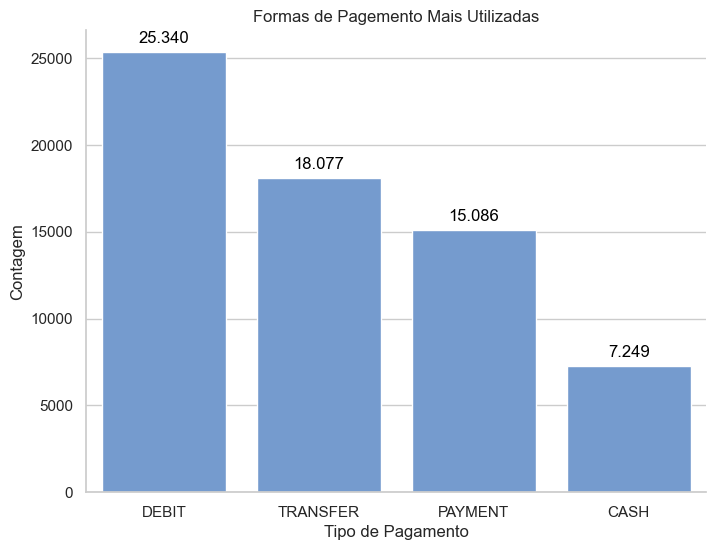

In [60]:
unique_orders = df_transformed[['order_id', 'type']].groupby(['order_id', 'type'], as_index=False).nunique()
value_counts = unique_orders['type'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=value_counts.index, y=value_counts.values, color="#69d")

for p in ax.patches:
    type_quantity = p.get_height()
    formatted_quantity = locale.format_string('%d', type_quantity, grouping=True)
    ax.annotate(formatted_quantity, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.title('Formas de Pagemento Mais Utilizadas')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Contagem')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

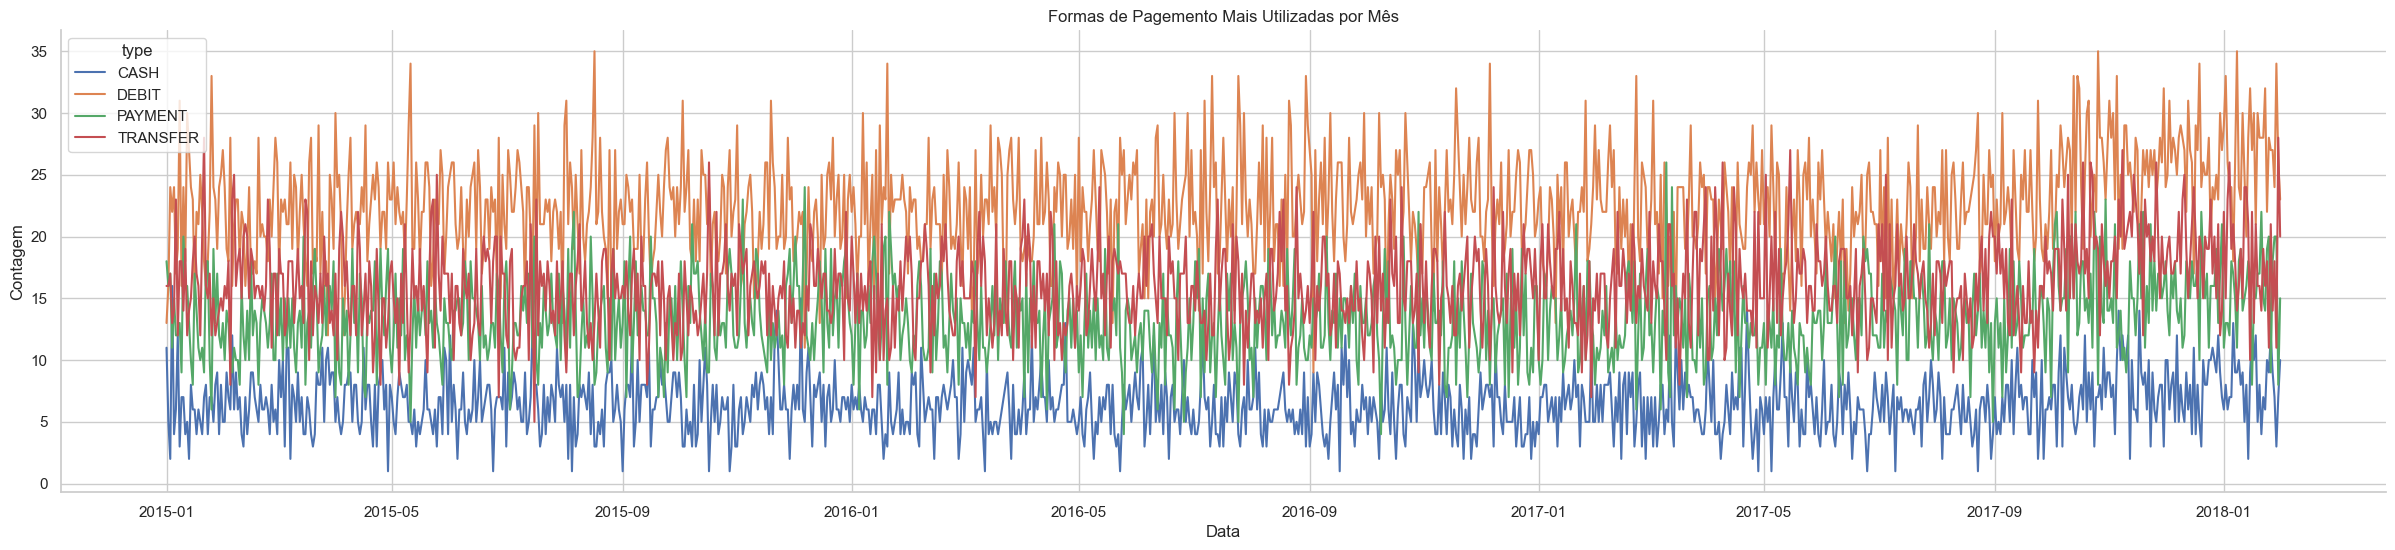

In [61]:
unique_orders = df_transformed[['order_date', 'order_id', 'type']].groupby(['order_date', 'order_id', 'type'], as_index=False).nunique()
value_counts = unique_orders.groupby(['type','order_date'])['type'].value_counts().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(30, 6))
ax = sns.lineplot(data=value_counts, x='order_date', y='count', hue='type')

plt.title('Formas de Pagemento Mais Utilizadas por Mês')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Contagem')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

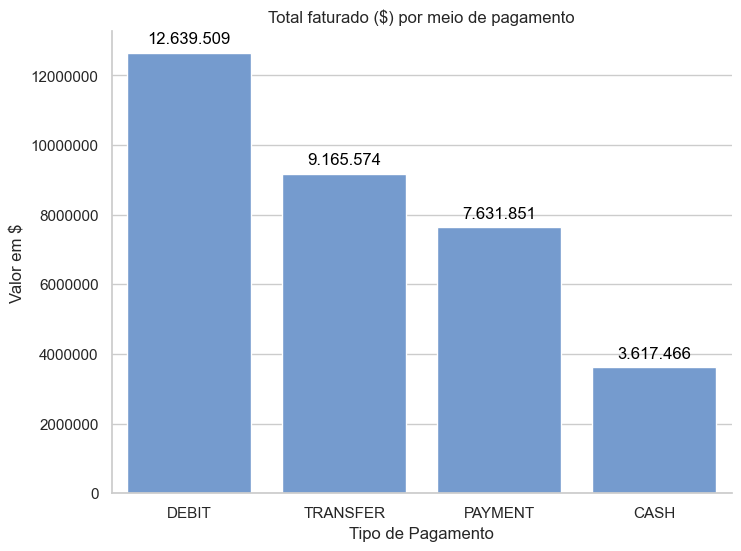

In [62]:
sales_per_type = df_transformed.groupby('type')['sales_per_customer'].sum().reset_index()
sales_per_type = sales_per_type.sort_values(by='sales_per_customer', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='type', y='sales_per_customer', data=sales_per_type, color="#69d")

for p in ax.patches:
    sales_value = p.get_height()
    formatted_sales = locale.format_string('%d', sales_value, grouping=True)
    ax.annotate(formatted_sales, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
    
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total faturado ($) por meio de pagamento')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Valor em $')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

<Figure size 1200x800 with 0 Axes>

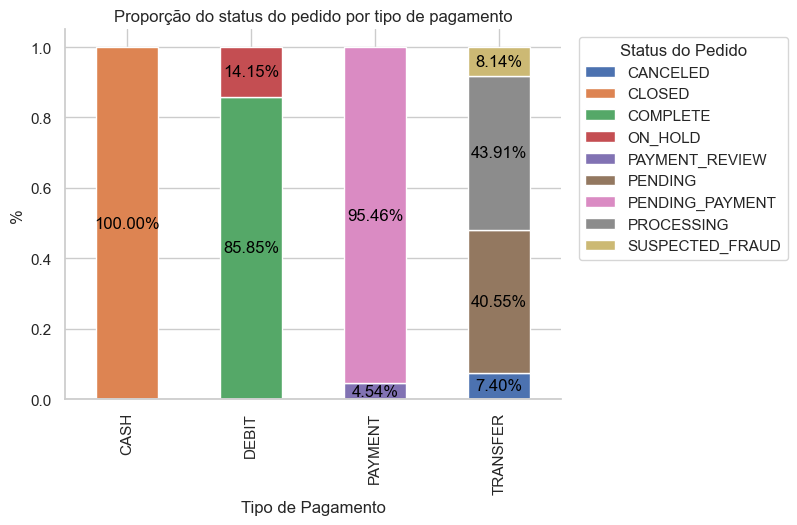

In [63]:
total_sales = df_transformed['type'].value_counts().reset_index()
sales_per_type = df_transformed.groupby(['type', 'order_status']).size().reset_index().rename(columns={0: 'count'})


sales_per_type = sales_per_type.merge(total_sales, on='type', suffixes=('', '_total'))

sales_per_type['proportion'] = sales_per_type['count'] / sales_per_type['count_total']

sales_per_type_pivot = sales_per_type.pivot(index='type', columns='order_status', values='proportion').fillna(0)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

ax = sales_per_type_pivot.plot(kind='bar', stacked=True)

for container in ax.containers:
    labels = [f'{val:.2%}' if val > 0 else '' for val in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=12, color='black')


plt.title('Proporção do status do pedido por tipo de pagamento')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('%')

plt.legend(title='Status do Pedido', loc='upper left', bbox_to_anchor=(1.02, 1))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()



In [64]:
pivot_table = pd.pivot_table(df_transformed, index='type', columns='order_status', 
                             values='order_id', aggfunc='count', fill_value=0)


pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

pivot_table

order_status,CANCELED,CLOSED,COMPLETE,ON_HOLD,PAYMENT_REVIEW,PENDING,PENDING_PAYMENT,PROCESSING,SUSPECTED_FRAUD
type,,,,,,,,,
CASH,0.000000,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DEBIT,0.000000,0.0,85.851793,14.148207,0.000000,0.000000,0.000000,0.000000,0.000000
PAYMENT,0.000000,0.0,0.000000,0.000000,4.536848,0.000000,95.463152,0.000000,0.000000
TRANSFER,7.401319,0.0,0.000000,0.000000,0.000000,40.548884,0.000000,43.906742,8.143055


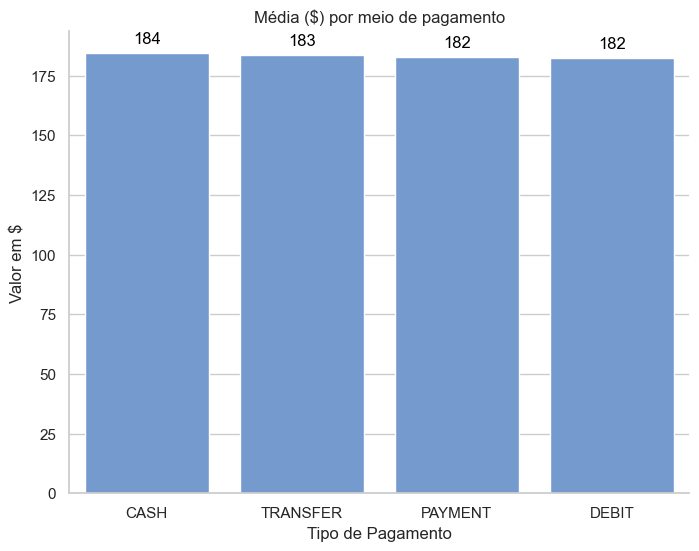

In [65]:
average_sales = df_transformed.groupby('type')['sales_per_customer'].mean().reset_index()
average_sales = average_sales.sort_values(by='sales_per_customer', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='type', y='sales_per_customer', data=average_sales, color="#69d")

for p in ax.patches:
    sales_value = p.get_height()
    formatted_sales = locale.format_string('%d', sales_value, grouping=True)
    ax.annotate(formatted_sales, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
    
plt.title('Média ($) por meio de pagamento')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Valor em $')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

* **Insights**

    * Apesar do potencial de outros meios de pagamento, apenas a forma de pagamento por débito tem transações completas. Um volume de $ 20.414.891 e de 40.412 pedidos não foram completados

* Clientes

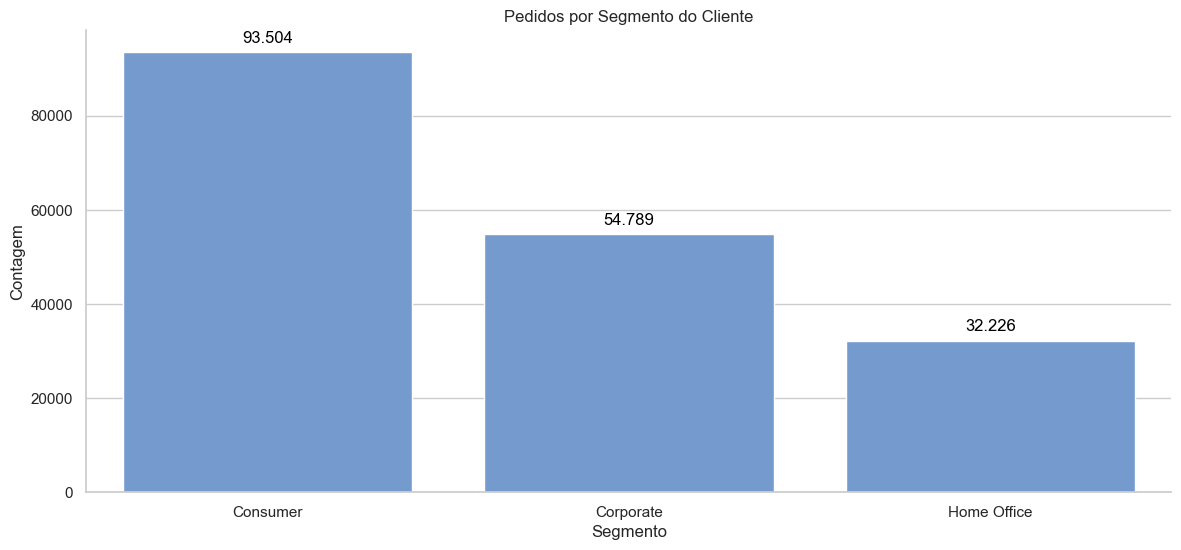

In [66]:
unique_orders = df_transformed[['customer_segment', 'order_id']].groupby(['customer_segment', 'order_id'], as_index=False).nunique()
value_counts = df_transformed.groupby(['customer_segment'])['customer_segment'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=value_counts.index, y=value_counts.values, color="#69d")

for p in ax.patches:
    type_quantity = p.get_height()
    formatted_quantity = locale.format_string('%d', type_quantity, grouping=True)
    ax.annotate(formatted_quantity, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Pedidos por Segmento do Cliente')
plt.xlabel('Segmento')
plt.ylabel('Contagem')
plt.show()

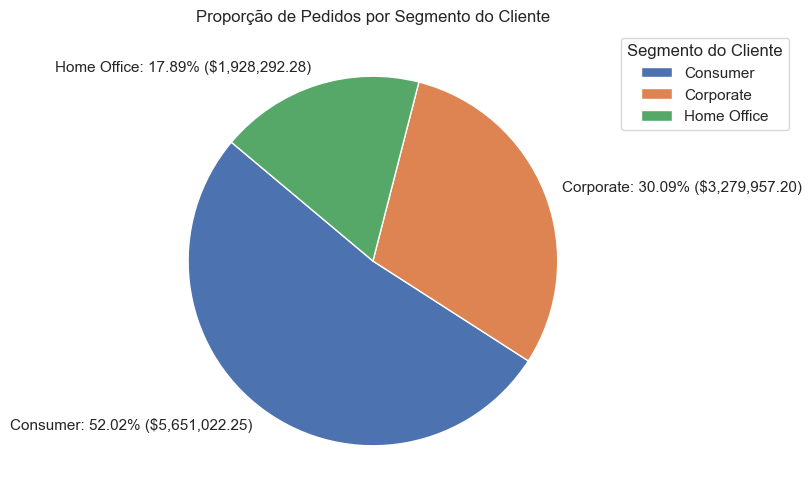

In [67]:
completed_transactions = df_transformed[df_transformed['order_status']== 'COMPLETE']
unique_orders = completed_transactions[['customer_segment', 'order_id', 'sales_per_customer']].groupby(['customer_segment', 'order_id'], as_index=False).nunique()
value_counts = unique_orders['customer_segment'].value_counts(normalize=True).reset_index()
value_counts.columns = ['customer_segment', 'proportion']

total_sales = completed_transactions.groupby(['customer_segment'])['sales_per_customer'].sum().reset_index()

data = pd.merge(total_sales, value_counts, on='customer_segment')

plt.figure(figsize=(6, 6))
plt.pie(data['proportion'], labels=[f"{segment}: {percentage * 100:.2f}% (${sales:,.2f})" for segment, percentage, sales in zip(data['customer_segment'], data['proportion'], data['sales_per_customer'])], autopct='', startangle=140)

plt.legend(data['customer_segment'], title='Segmento do Cliente', loc='upper left', bbox_to_anchor=(1.02, 1))
plt.title('Proporção de Pedidos por Segmento do Cliente')

plt.show()


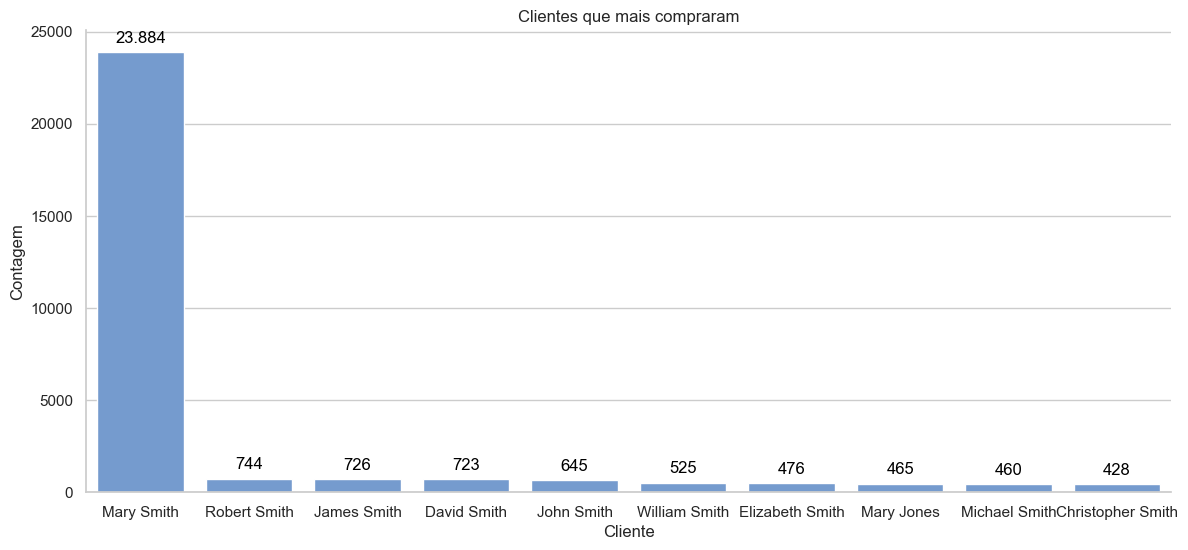

In [68]:
unique_orders = df_transformed[['full_name', 'order_id']].groupby(['full_name', 'order_id'], as_index=False).nunique()
value_counts = df_transformed.groupby(['full_name'])['full_name'].value_counts()
top_10_value_counts = value_counts.sort_values(ascending=False).head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=top_10_value_counts.index, y=top_10_value_counts.values, color="#69d")

for p in ax.patches:
    type_quantity = p.get_height()
    formatted_quantity = locale.format_string('%d', type_quantity, grouping=True)
    ax.annotate(formatted_quantity, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.title('Clientes que mais compraram')
plt.xlabel('Cliente')
plt.ylabel('Contagem')
plt.show()

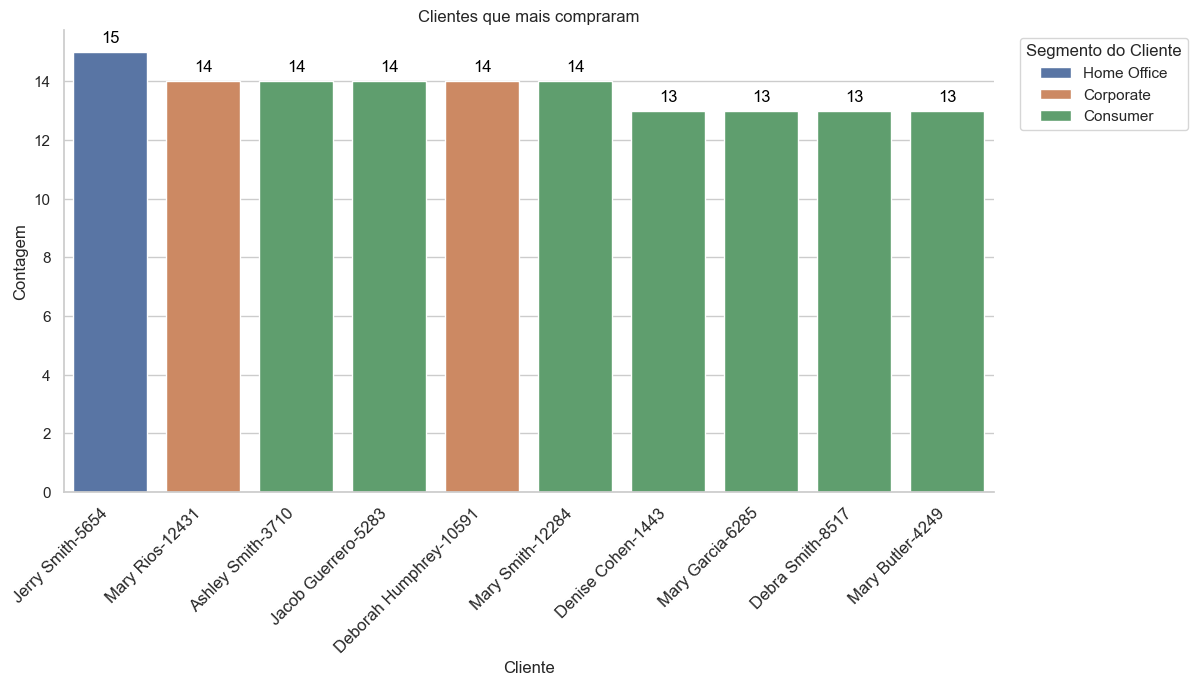

In [69]:
df_transformed['full_name_id'] = df_transformed['full_name'] + '-' + df_transformed['customer_id'].astype(str)


df_grouped = df_transformed[['full_name_id', 'order_id', 'customer_segment']].groupby(['full_name_id', 'order_id', 'customer_segment'], as_index=False).nunique()


df_change_full_name = df_grouped.groupby(['full_name_id', 'customer_segment'])['order_id'].size().reset_index().rename(columns={'order_id': 'count'})


df_change_full_name = df_change_full_name.sort_values(by='count', ascending=False).head(10)


sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='full_name_id', y='count', hue="customer_segment", data=df_change_full_name, dodge=False)

for p in ax.patches:
    type_quantity = p.get_height()
    if not np.isnan(type_quantity):
        formatted_quantity = locale.format_string('%d', type_quantity, grouping=True)
    else:
        formatted_quantity = "N/A"  # Handle NaN values differently
    ax.annotate(formatted_quantity, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
ax.set_xticklabels(df_change_full_name['full_name_id'], fontsize=12, ha='right', rotation=45)

plt.legend(title='Segmento do Cliente', loc='upper left', bbox_to_anchor=(1.02, 1))
plt.title('Clientes que mais compraram')
plt.xlabel('Cliente')
plt.ylabel('Contagem')
plt.show()


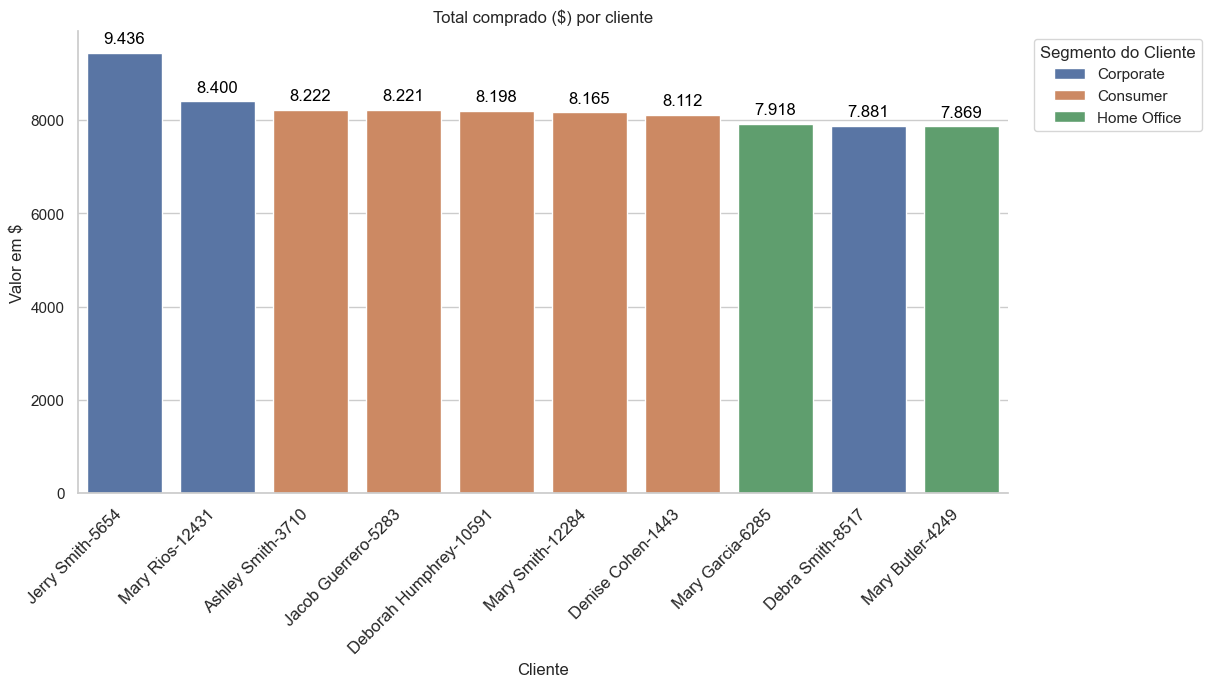

In [70]:
sales_per_client = df_transformed.groupby(['full_name_id', 'customer_segment'])['sales_per_customer'].sum().reset_index()
sales_per_client = sales_per_client.sort_values(by='sales_per_customer', ascending=False)
sales_per_client = sales_per_client.head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='full_name_id', y='sales_per_customer', data=sales_per_client, hue='customer_segment',dodge=False)

for p in ax.patches:
    type_quantity = p.get_height()
    if not np.isnan(type_quantity):
        formatted_quantity = locale.format_string('%d', type_quantity, grouping=True)
    else:
        formatted_quantity = "N/A"  # Handle NaN values differently
    ax.annotate(formatted_quantity, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
ax.set_xticklabels(df_change_full_name['full_name_id'], fontsize=12, ha='right', rotation=45)

plt.legend(title='Segmento do Cliente', loc='upper left', bbox_to_anchor=(1.02, 1))
plt.title('Total comprado ($) por cliente')
plt.xlabel('Cliente')
plt.ylabel('Valor em $')
plt.show()

* **Insights**
    * A maioria das transações foram realizadas por consumidos, seguido de clientes do setor corpativo e home office;
    * Existem alguns clientes recorrentes. Um segundo passo pode ser analisar a recorrência desses clientes, entender quem compra só uma vez e não compra mais e definir possíveis estratégias para resgatar esses clientes

* Mercado

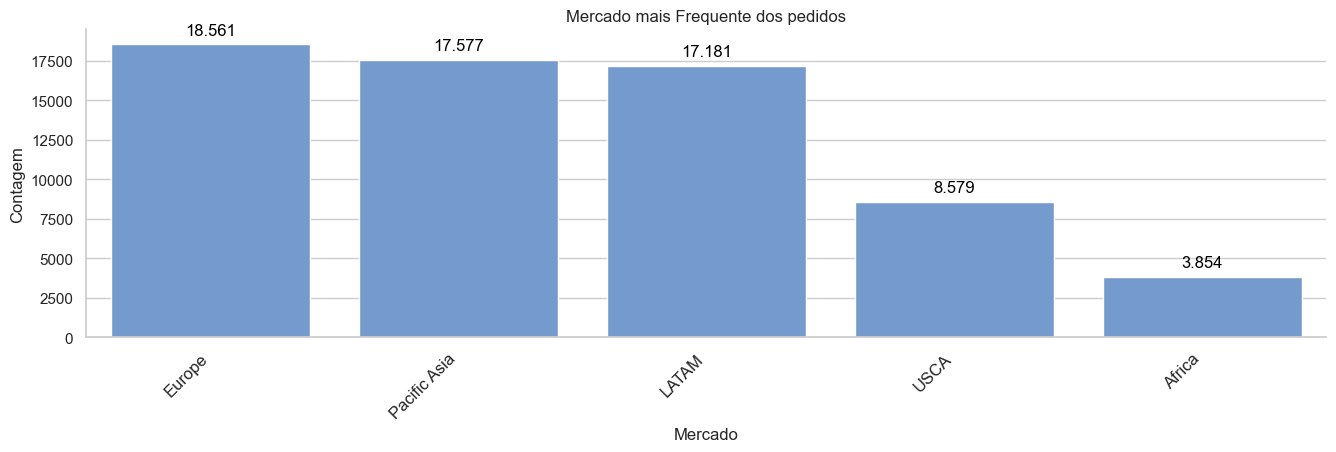

In [71]:
unique_orders = df_transformed[['market', 'order_id']].groupby(['market', 'order_id'], as_index=False).nunique()
value_counts = unique_orders['market'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=value_counts.index, y=value_counts.values, color="#69d")

for p in ax.patches:
    type_quantity = p.get_height()
    formatted_quantity = locale.format_string('%d', type_quantity, grouping=True)
    ax.annotate(formatted_quantity, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
ax.set_xticklabels(value_counts.index, fontsize=12, ha='right', rotation=45)

plt.title('Mercado mais Frequente dos pedidos')
plt.xlabel('Mercado')
plt.ylabel('Contagem')
plt.show()

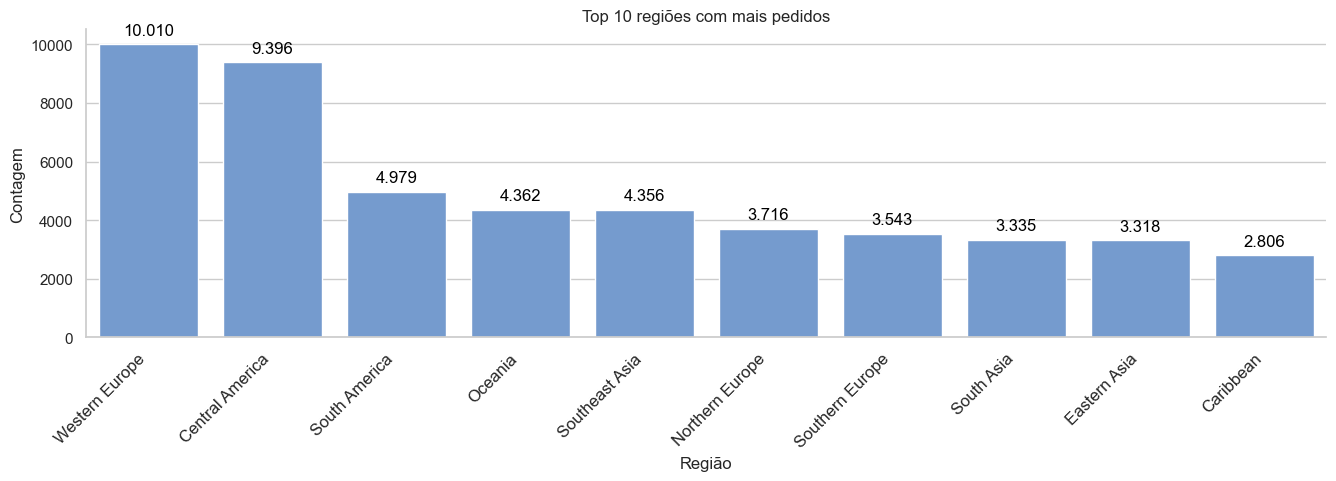

In [72]:
unique_orders = df_transformed[['order_region', 'order_id']].groupby(['order_region', 'order_id'], as_index=False).nunique()
value_counts = unique_orders['order_region'].value_counts()
top10 = value_counts.head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=top10.index, y=top10.values, color="#69d")

for p in ax.patches:
    type_quantity = p.get_height()
    formatted_quantity = locale.format_string('%d', type_quantity, grouping=True)
    ax.annotate(formatted_quantity, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
ax.set_xticklabels(top10.index, fontsize=12, ha='right', rotation=45)

plt.title('Top 10 regiões com mais pedidos')
plt.xlabel('Região')
plt.ylabel('Contagem')
plt.show()

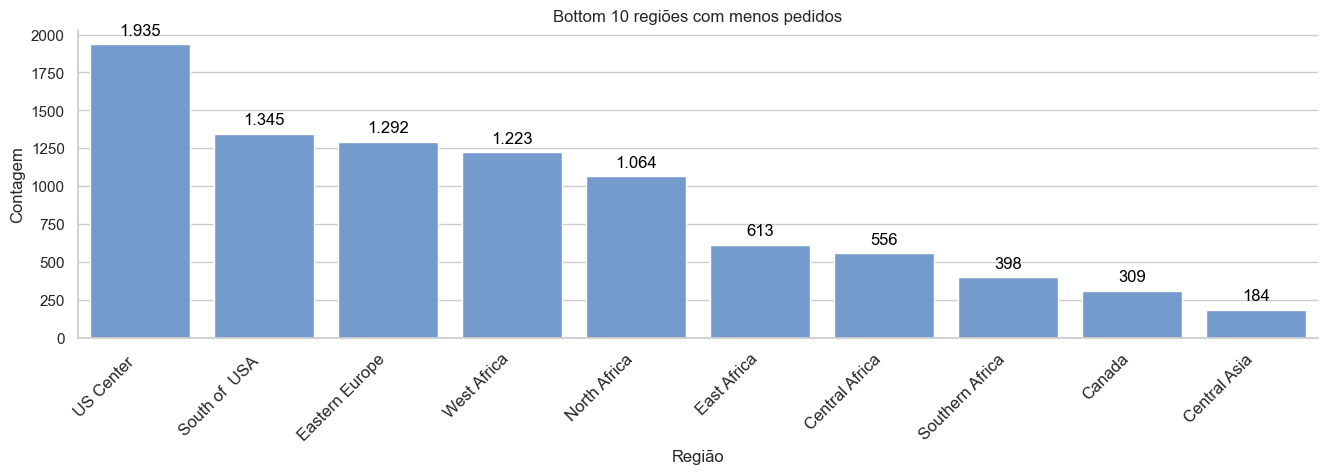

In [73]:
unique_orders = df_transformed[['order_region', 'order_id']].groupby(['order_region', 'order_id'], as_index=False).nunique()
value_counts = unique_orders['order_region'].value_counts()
bottom10 = value_counts.tail(10)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=bottom10.index, y=bottom10.values, color="#69d")

for p in ax.patches:
    type_quantity = p.get_height()
    formatted_quantity = locale.format_string('%d', type_quantity, grouping=True)
    ax.annotate(formatted_quantity, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
ax.set_xticklabels(bottom10.index, fontsize=12, ha='right', rotation=45)

plt.title('Bottom 10 regiões com menos pedidos')
plt.xlabel('Região')
plt.ylabel('Contagem')
plt.show()

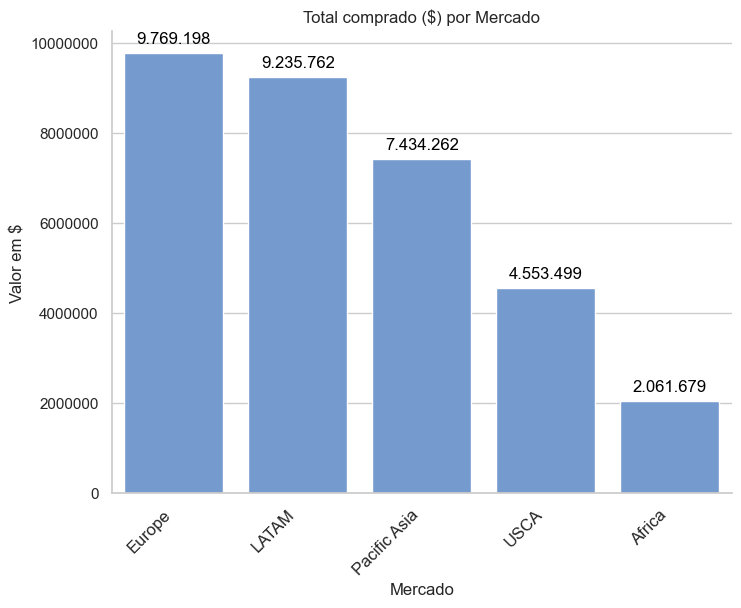

In [74]:
sales_per_market = df_transformed.groupby('market')['sales_per_customer'].sum().reset_index()
sales_per_market = sales_per_market.sort_values(by='sales_per_customer', ascending=False)


sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='market', y='sales_per_customer', data=sales_per_market, color="#69d")

for p in ax.patches:
    sales_value = p.get_height()
    formatted_sales = locale.format_string('%d', sales_value, grouping=True)
    ax.annotate(formatted_sales, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
ax.set_xticklabels(sales_per_market['market'], fontsize=12, ha='right', rotation=45)
    
plt.ticklabel_format(style='plain', axis='y')

plt.title('Total comprado ($) por Mercado')
plt.xlabel('Mercado')
plt.ylabel('Valor em $')
plt.show()

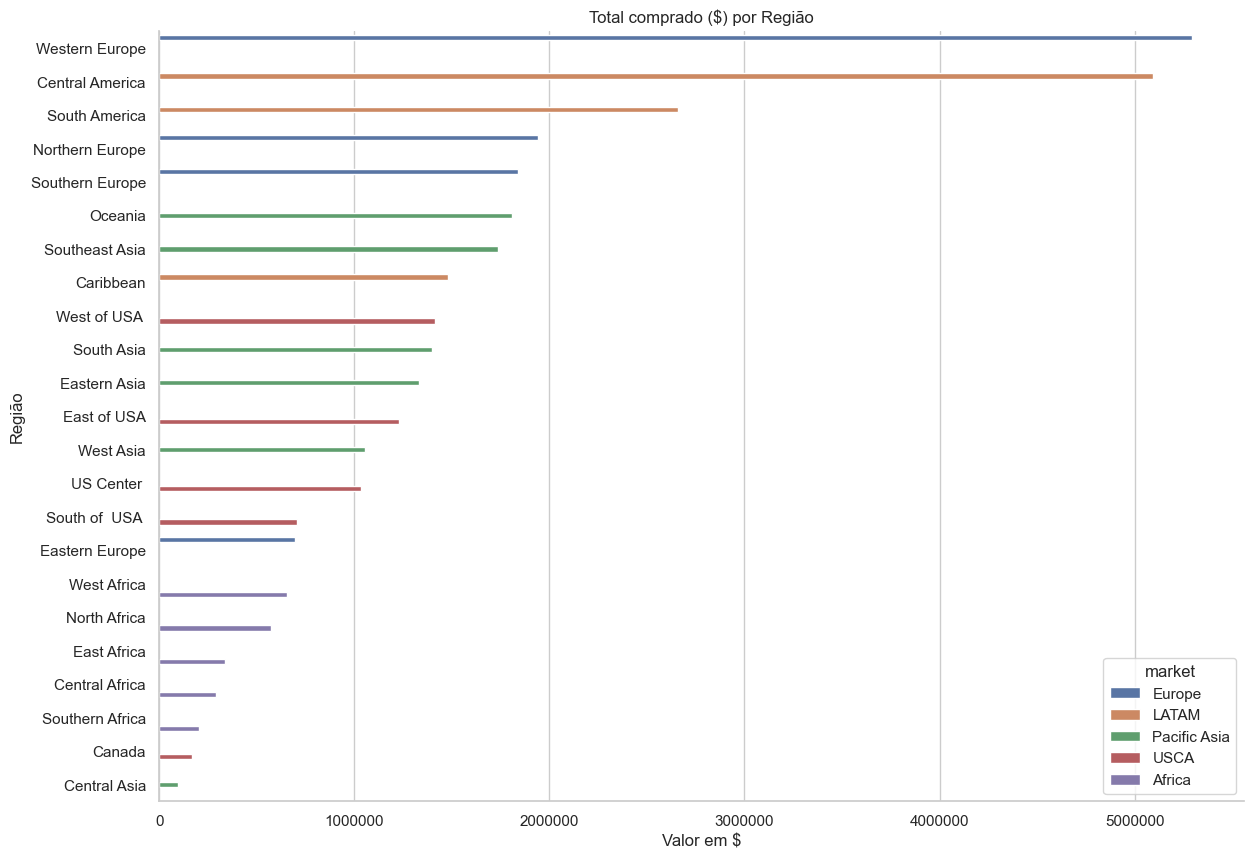

In [75]:
sales_per_region = df_transformed.groupby(['order_region', 'market'])['sales_per_customer'].sum().reset_index()
sales_per_region = sales_per_region.sort_values(by='sales_per_customer', ascending=False)


sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='sales_per_customer', y='order_region', data=sales_per_region, hue='market')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Total comprado ($) por Região')
plt.xlabel('Valor em $')
plt.ylabel('Região')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

* **Insights**
    * A região mais rentável e com mais pedidos é a Europa;
    * Embora a empresa seja Americana, a região dos EUA e Canadá figuram entre as que tiveram pior performance

#### Qual destino tem maior atraso na entrega?

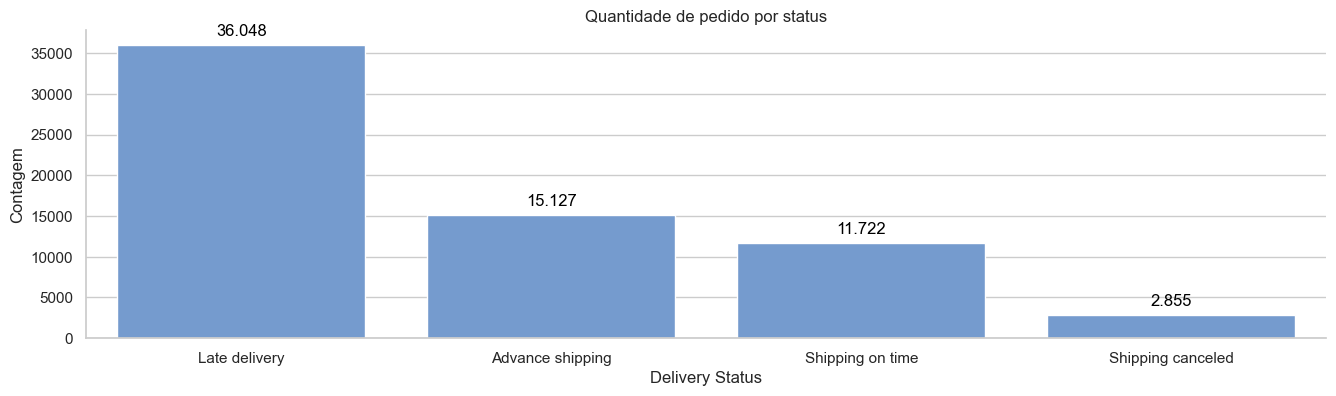

In [76]:
unique_orders = df_transformed[['order_id', 'delivery_status']].groupby(['order_id', 'delivery_status'], as_index=False).nunique()
value_counts = unique_orders['delivery_status'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=value_counts.index, y=value_counts.values, color="#69d")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    type_quantity = p.get_height()
    formatted_quantity = locale.format_string('%d', type_quantity, grouping=True)
    ax.annotate(formatted_quantity, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.title('Quantidade de pedido por status')
plt.xlabel('Delivery Status')
plt.ylabel('Contagem')
plt.show()

In [77]:

df_late_delivery = df_transformed[df_transformed['delivery_status'] == 'Late delivery']


total_orders = df_transformed.groupby(['order_region', 'market'])['order_id'].nunique().reset_index()


late_deliveries = df_late_delivery.groupby(['order_region', 'market'])['order_id'].nunique().reset_index()


result = total_orders.merge(late_deliveries, on=['order_region', 'market'], how='left', suffixes=('_total', '_late'))

result.rename(columns= {'order_id_total': 'Total de Pedidos', 'order_id_late': 'Total de Pedidos Atrasados'}, inplace=True)


result['% Pedidos Atrasados'] = (result['Total de Pedidos Atrasados'] / result['Total de Pedidos']) * 100

result = result.sort_values(by='% Pedidos Atrasados', ascending=False).reset_index(drop=True)

result.head(25)


,order_region,market,Total de Pedidos,Total de Pedidos Atrasados,% Pedidos Atrasados
0,Central Africa,Africa,556,320,57.553957
1,East Africa,Africa,613,348,56.769984
2,South of USA,USCA,1345,753,55.985130
3,West Asia,Pacific Asia,2022,1132,55.984174
4,Eastern Europe,Europe,1292,723,55.959752
5,South Asia,Pacific Asia,3335,1865,55.922039
6,Western Europe,Europe,10010,5585,55.794206
7,Southeast Asia,Pacific Asia,4356,2421,55.578512
8,Central Asia,Pacific Asia,184,102,55.434783
9,US Center,USCA,1935,1071,55.348837


* **Insights**
    * Um ponto de atenção aqui é que a maior parte dos pedidos tem um risco de chegar atrasado. É muito importante para a satisfação do cliente que a empresa seja capaz de entregar seus pedidos no tempo previsto. Aliás, está é uma importante métrica para analisar a qualidade do operador logístico.

* Suspeita de Fraude

In [78]:
df_suspect_of_fraud = df_transformed[df_transformed['order_status'] == 'SUSPECTED_FRAUD']
df_suspect_of_fraud.shape

(4062, 57)

In [79]:
df_suspect_of_fraud.order_id.nunique()

1488

In [80]:
value_counts

delivery_status
Late delivery        36048
Advance shipping     15127
Shipping on time     11722
Shipping canceled     2855
Name: count, dtype: int64

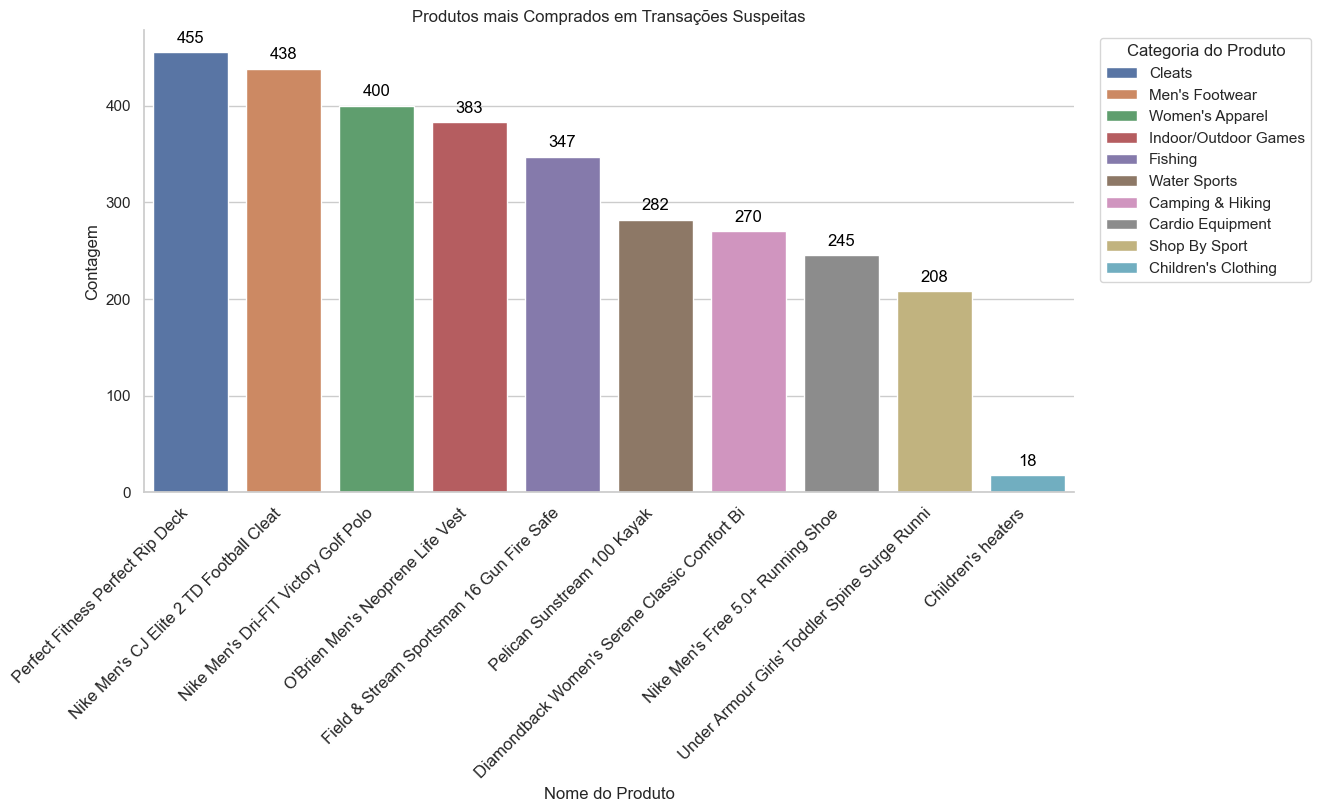

In [81]:
unique_orders = df_suspect_of_fraud[['product_name', 'order_id', 'category_name']].groupby(['product_name', 'order_id', 'category_name'], as_index=False).nunique()


product_count = unique_orders.groupby(['product_name', 'category_name'])['order_id'].size().reset_index().rename(columns={'order_id': 'count'})


product_count = product_count.sort_values(by='count', ascending=False).head(10)


sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='product_name', y='count', hue="category_name", data=product_count, dodge=False)

for p in ax.patches:
    type_quantity = p.get_height()
    if not np.isnan(type_quantity):
        formatted_quantity = locale.format_string('%d', type_quantity, grouping=True)
    else:
        formatted_quantity = "N/A"  # Handle NaN values differently
    ax.annotate(formatted_quantity, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
ax.set_xticklabels(product_count['product_name'], fontsize=12, ha='right', rotation=45)

plt.legend(title='Categoria do Produto', loc='upper left', bbox_to_anchor=(1.02, 1))
plt.title('Produtos mais Comprados em Transações Suspeitas')
plt.xlabel('Nome do Produto')
plt.ylabel('Contagem')
plt.show()


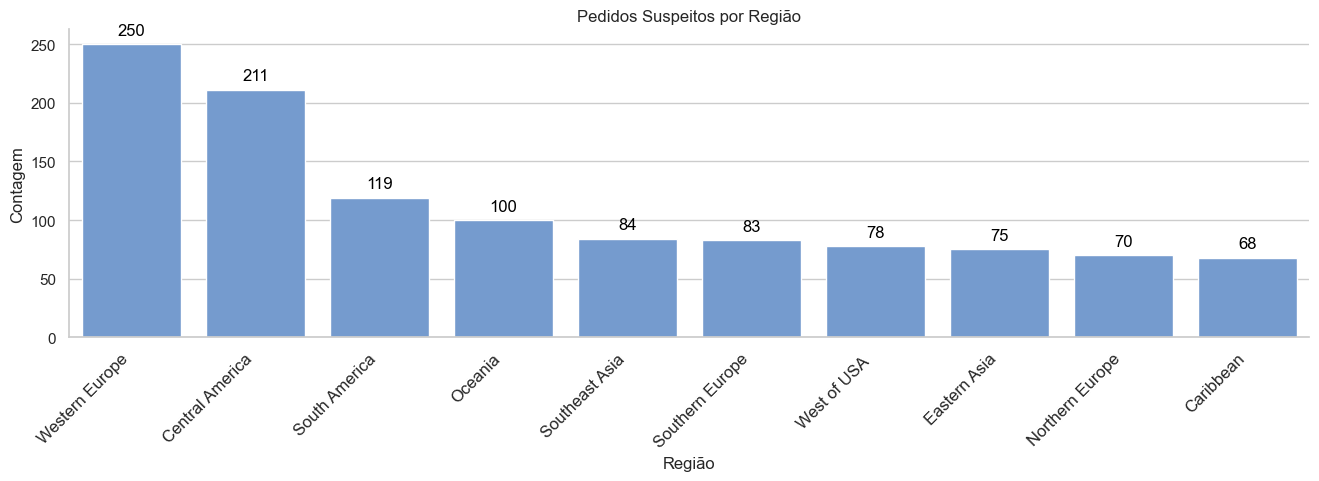

In [82]:
unique_orders = df_suspect_of_fraud[['order_id', 'order_region']].groupby(['order_id', 'order_region'], as_index=False).nunique()
value_counts = unique_orders['order_region'].value_counts()
value_counts = value_counts.head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=value_counts.index, y=value_counts.values, color="#69d")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(value_counts.index, fontsize=12, ha='right', rotation=45)

for p in ax.patches:
    type_quantity = p.get_height()
    formatted_quantity = locale.format_string('%d', type_quantity, grouping=True)
    ax.annotate(formatted_quantity, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')


plt.title('Pedidos Suspeitos por Região')
plt.xlabel('Região')
plt.ylabel('Contagem')
plt.show()

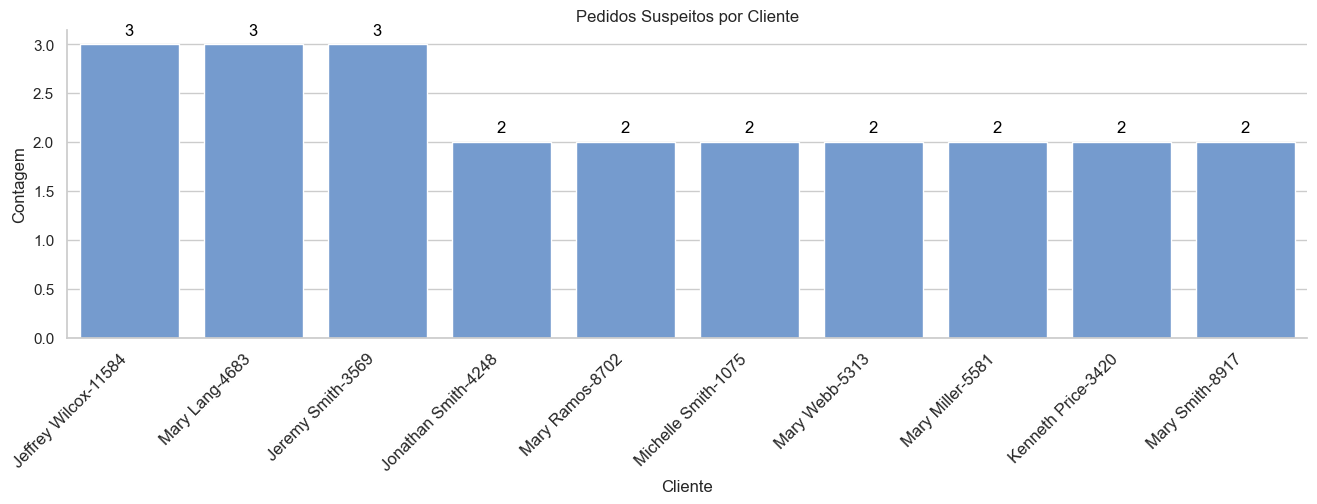

In [83]:
df_suspect_of_fraud['full_name_id'] = df_suspect_of_fraud['full_name'] + '-' + df_suspect_of_fraud['customer_id'].astype(str)
unique_orders = df_suspect_of_fraud[['order_id', 'full_name_id']].groupby(['order_id', 'full_name_id'], as_index=False).nunique()
value_counts = unique_orders['full_name_id'].value_counts()
value_counts = value_counts.head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=value_counts.index, y=value_counts.values, color="#69d")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(value_counts.index, fontsize=12, ha='right', rotation=45)

for p in ax.patches:
    type_quantity = p.get_height()
    formatted_quantity = locale.format_string('%d', type_quantity, grouping=True)
    ax.annotate(formatted_quantity, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')


plt.title('Pedidos Suspeitos por Cliente')
plt.xlabel('Cliente')
plt.ylabel('Contagem')
plt.show()

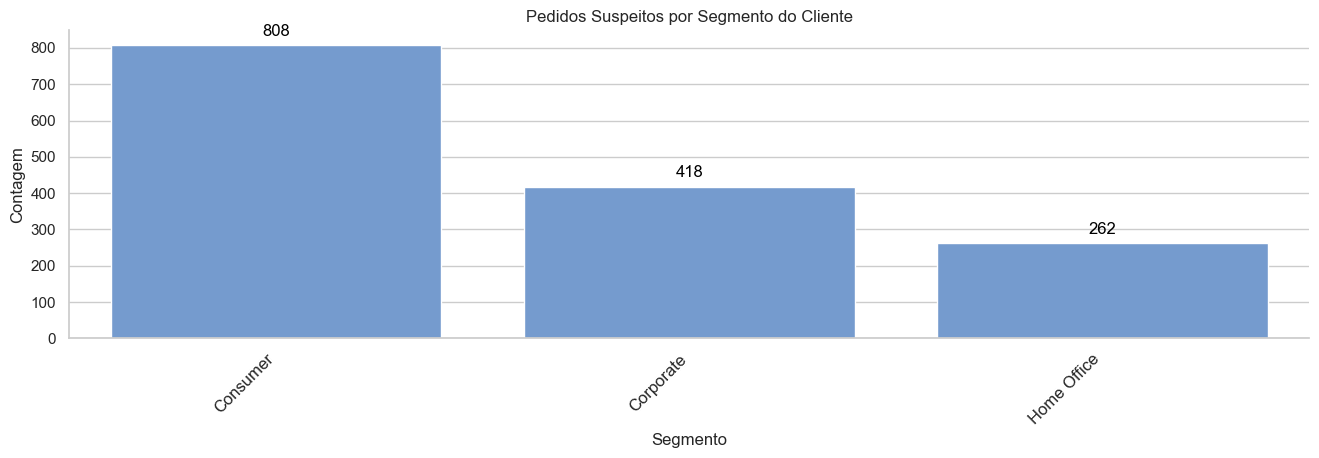

In [84]:
unique_orders = df_suspect_of_fraud[['order_id', 'customer_segment']].groupby(['order_id', 'customer_segment'], as_index=False).nunique()
value_counts = unique_orders['customer_segment'].value_counts()
value_counts = value_counts.head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=value_counts.index, y=value_counts.values, color="#69d")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(value_counts.index, fontsize=12, ha='right', rotation=45)

for p in ax.patches:
    type_quantity = p.get_height()
    formatted_quantity = locale.format_string('%d', type_quantity, grouping=True)
    ax.annotate(formatted_quantity, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')


plt.title('Pedidos Suspeitos por Segmento do Cliente')
plt.xlabel('Segmento')
plt.ylabel('Contagem')
plt.show()

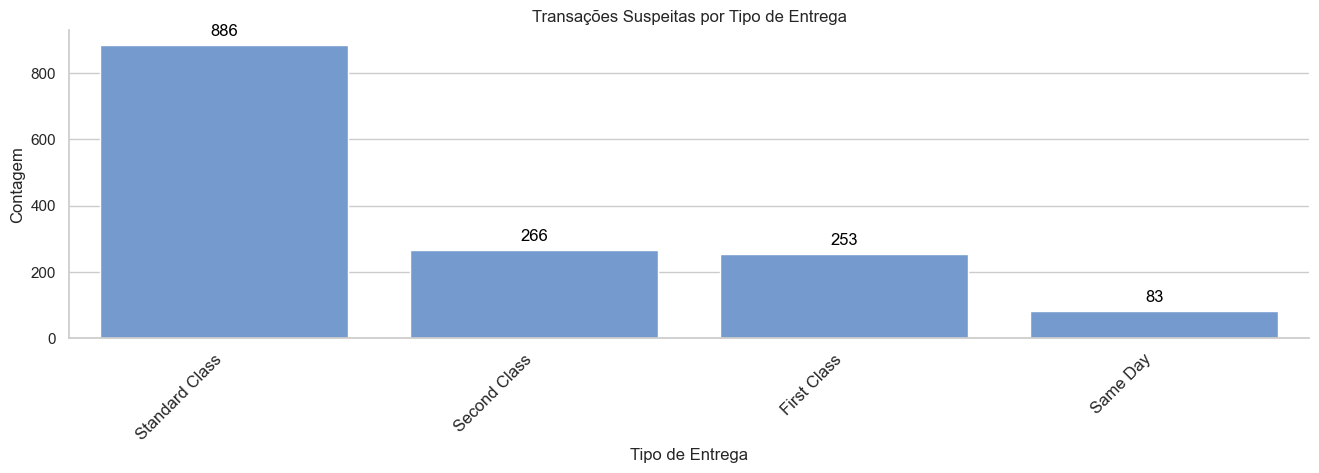

In [85]:
unique_orders = df_suspect_of_fraud[['order_id', 'shipping_mode']].groupby(['order_id', 'shipping_mode'], as_index=False).nunique()
value_counts = unique_orders['shipping_mode'].value_counts()
value_counts = value_counts.head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=value_counts.index, y=value_counts.values, color="#69d")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(value_counts.index, fontsize=12, ha='right', rotation=45)

for p in ax.patches:
    type_quantity = p.get_height()
    formatted_quantity = locale.format_string('%d', type_quantity, grouping=True)
    ax.annotate(formatted_quantity, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')


plt.title('Transações Suspeitas por Tipo de Entrega')
plt.xlabel('Tipo de Entrega')
plt.ylabel('Contagem')
plt.show()

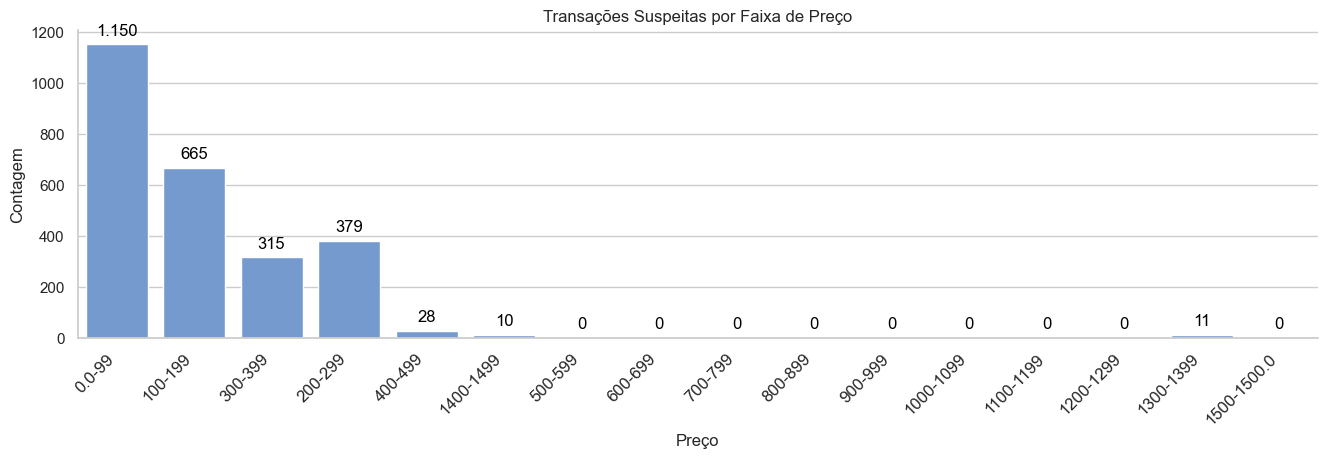

In [86]:
max_price = df_suspect_of_fraud['product_price'].max()
price_ranges = [0.0] + [x for x in range(100, int(max_price) + 100, 100)] + [max_price + 1]
df_suspect_of_fraud['product_price_ranges'] = pd.cut(df_suspect_of_fraud['product_price'], bins=price_ranges, labels=[f"{start}-{end-1}" for start, end in zip(price_ranges, price_ranges[1:])])

unique_orders = df_suspect_of_fraud[['order_id', 'product_price_ranges']].groupby(['order_id', 'product_price_ranges'], as_index=False).nunique()
value_counts = unique_orders['product_price_ranges'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=value_counts.index, y=value_counts.values, color="#69d")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(value_counts.index, fontsize=12, ha='right', rotation=45)

for p in ax.patches:
    type_quantity = p.get_height()
    formatted_quantity = locale.format_string('%d', type_quantity, grouping=True)
    ax.annotate(formatted_quantity, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')


plt.title('Transações Suspeitas por Faixa de Preço')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.show()

* **Insights**
    * A maior parte das transações suspeitas de fraude estão na faixa de 0-299 dolares, seguindo a mesma distribuição dos pedidos como um todo;
    * As transações suspeitas, em sua maioria, se encontram no segmento de consumidores;
    * A Europa Ocidental é a lider em suspeita de fraude;
    * O tipo de entrega padrão é o líder em suspeita de fraude;
    * O único método de pagamento com suspeita de fraude é a transferência.